# Блок 1

Воспользовавшись [данными](https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs/code) и удобными для вас библиотеками для рисования/обработки датафреймов ответьте на список вопросов, аргументировав свою позицию.


1. Можно ли по данным датасета спотифай сказать, что музыкальные композиции с 90х годов стали сложнее или проще

2. Коррелирует ли характер тональности с темпом

3. (valence - Measures how positive a track sounds, from 1 to 0) - как коррелирует с характером(мажор/минор) тональности и коррелирует ли

4. Можно ли сказать, что за последнее время ключи тональностей (key) стали менее/более разнообразными

5. Какое совместное влияние оказывают факторы tempo, mode и loudness на показатель valence


Блок 2

Воспользовавшись данными с сайта о продаже музыкальных инструментов и удобными для вас библиотеками для рисования/обработки датафреймов ответьте на список вопросов, аргументировав свою позицию.


1. Какие факторы влияют на цену инструмента и как?

2. Можно ли разделить объявления на какие-то явно разделяющиеся по некоторому принципу категории: винтаж/ширпотреб/мастеровое и тд

In [6]:
print("asda")

asda


In [7]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import pointbiserialr
from scipy.stats import gmean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import ast

In [8]:
df = pd.read_csv("tracks_features.csv")

In [9]:
df.head(2)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02


In [10]:
df_filtered = df[df['year'] >= 1]
without_meta = df_filtered.loc[:,"danceability": 'year']

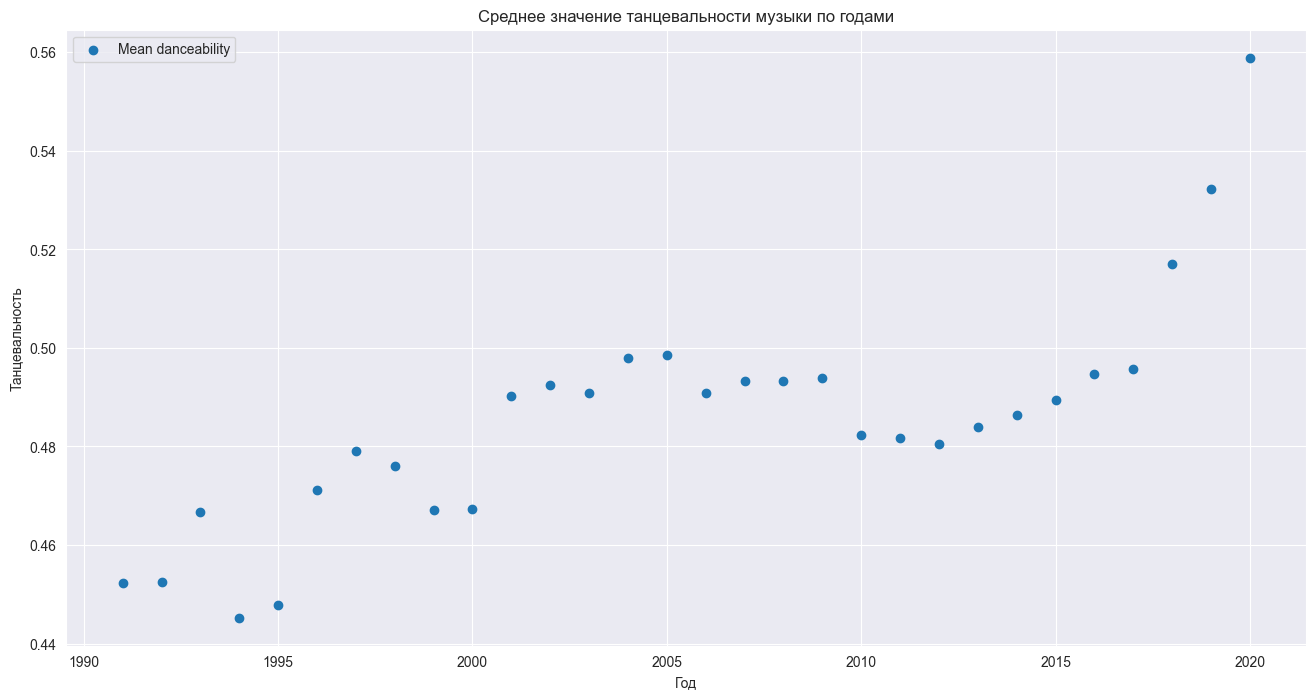

In [11]:
average_danceability = without_meta[without_meta['year']>1990]
average_danceability = average_danceability.groupby('year')['danceability'].mean().reset_index()
plt.figure(figsize=(16, 8))
plt.scatter(average_danceability['year'].values, average_danceability['danceability'].values, marker='o', label='Mean danceability')


plt.title('Среднее значение танцевальности музыки по годами')
plt.xlabel('Год')
plt.ylabel('Танцевальность')

plt.legend()

In [12]:
without_meta["key"].unique()

array([ 7, 11,  2,  9,  6,  4,  1,  0,  8, 10,  5,  3], dtype=int64)

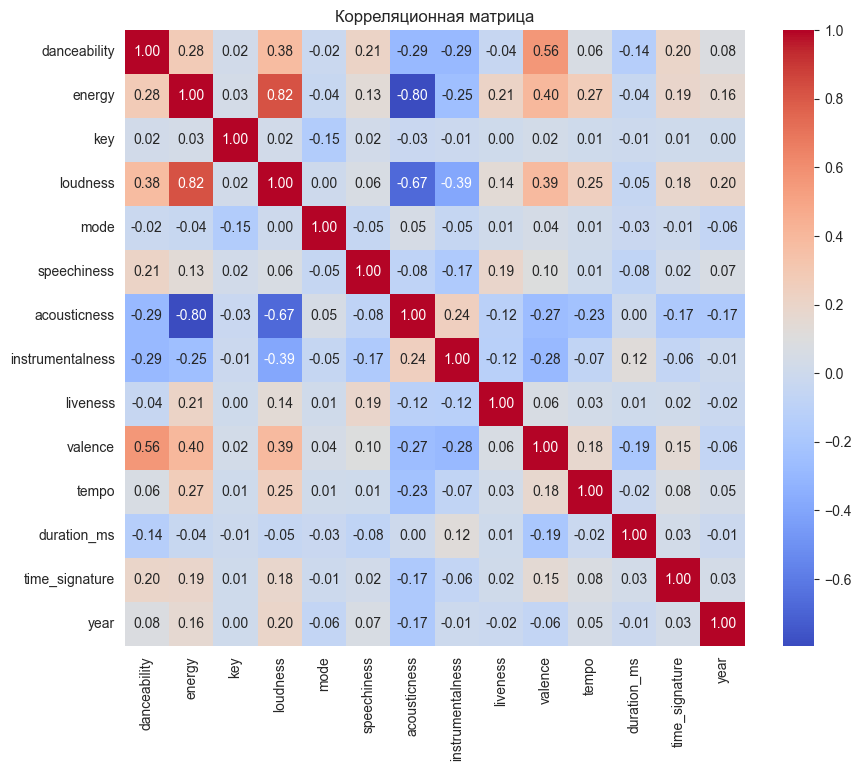

In [13]:
correlation_matrix = without_meta.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,   annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица')
plt.show()

In [14]:
for_groups =   without_meta[without_meta['year'] >=1]
for_groups = without_meta.groupby(['year', 'key']).size().unstack(fill_value=0)
for_groups_ratio = for_groups.div(for_groups.sum(axis=1), axis=0)#Возьмём доли тональстей по годам, а не их абслолютное количество


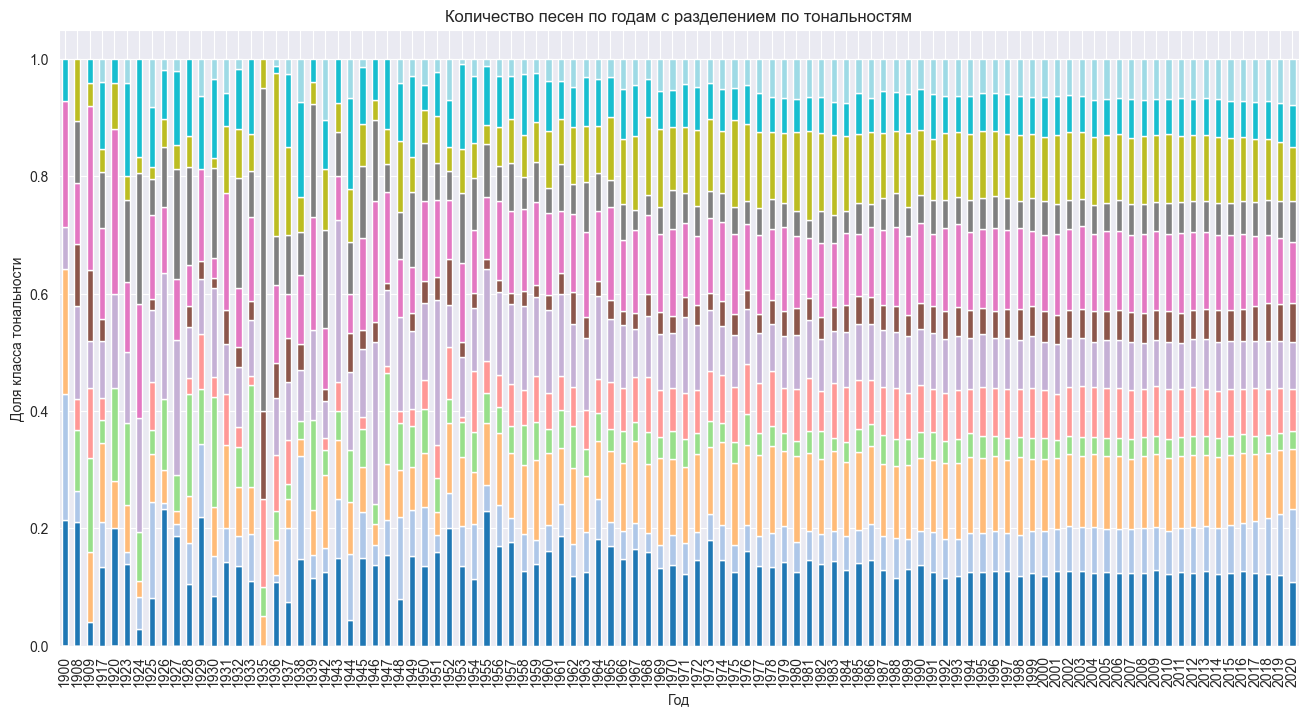

In [15]:
ax  = for_groups_ratio.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20', legend= False)
all_years = for_groups_ratio.index.tolist()
plt.title('Количество песен по годам с разделением по тональностям')
plt.ylabel('Доля класса тональности')
plt.xlabel('Год')
#plt.legend(title='Классы песен')
plt.show()

In [16]:
 for_groups_ratio["heterogenity"] = (for_groups_ratio.mean(axis=1) - for_groups_ratio.apply(gmean,axis=1))*10**3

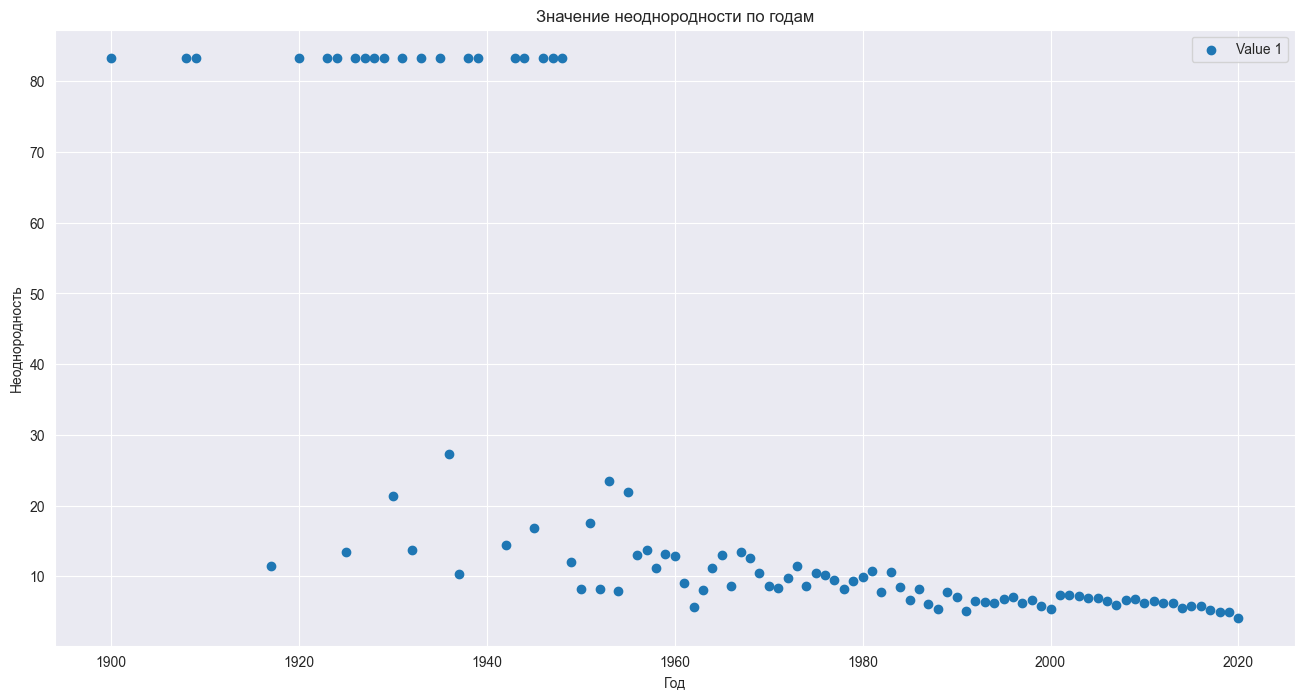

In [17]:
plt.figure(figsize=(16, 8))
plt.scatter(all_years, for_groups_ratio["heterogenity"], marker='o', label='Value 1')


plt.title('Значение неоднородности по годам')
plt.xlabel('Год')
plt.ylabel('Неоднородность')


plt.legend()

In [18]:
X = without_meta.loc[: , ['tempo', 'mode', 'loudness']].values
Y = without_meta['valence'].values
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
Y = np.array(Y, dtype=np.float64)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [19]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
pred_res = linear_regression.predict(X_test)

In [20]:
without_meta["valence"].describe()

count    1.204015e+06
mean     4.279847e-01
std      2.704841e-01
min      0.000000e+00
25%      1.910000e-01
50%      4.030000e-01
75%      6.440000e-01
max      1.000000e+00
Name: valence, dtype: float64

<Axes: ylabel='Density'>

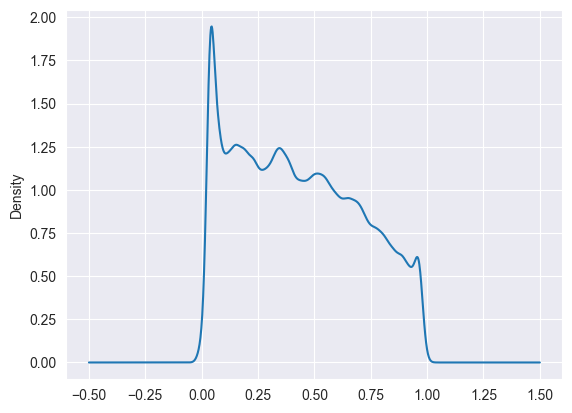

In [21]:
without_meta["valence"].plot(kind = "kde")

In [22]:
def mae_score(y_true, y_pred):
    n = len(y_true)

    return 1 / n * np.sum(np.abs(y_true - y_pred))
mae_score(Y_test, pred_res)

0.20834104118127256

In [23]:
mean_squared_error(Y_test, pred_res)

0.061779229037067486

In [24]:
r2_score(Y_test, pred_res)

0.15690540182274526

In [25]:
linear_regression.coef_

array([0.00075409, 0.02147105, 0.01408214, 0.        ])

In [26]:
df = pd.read_csv("reverb_aggregated.csv") 

In [27]:
df['param_dict'] = df['param_dict'].apply(ast.literal_eval)

In [28]:
df_extra = pd.json_normalize(df['param_dict'])

In [29]:
# Ключи в колонке param_dict сделаем новыми полями таблицы
df = df.drop('param_dict', axis=1).join(df_extra)
df.columns

Index(['title', 'description', 'text', 'price', 'listing_id', 'Condition',
       'Brand', 'Model', 'Categories', 'Year', 'Fretboard Material',
       'Pickup Configuration', 'Color Family', 'Right / Left Handed',
       'Body Shape', 'Number of Strings', 'Fretboard Radius', 'Neck Material',
       'Offset Body', 'Finish Style', 'Body Type', 'Body Material', 'Series',
       'Bridge/Tailpiece Type', 'Wood Top Style', 'Nut Width', 'Model Family',
       'Scale Length', 'Neck Construction', 'Number of Frets', 'Made In',
       'Finish', 'Product Family', 'Artist', 'Frets', 'Top Material',
       'Finish Features', 'Model Sub-Family'],
      dtype='object')

In [30]:
df.head(5)

,title,description,text,price,listing_id,Condition,Brand,Model,Categories,Year,...,Neck Construction,Number of Frets,Made In,Finish,Product Family,Artist,Frets,Top Material,Finish Features,Model Sub-Family
0,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,"$1,131.92",cbbfd652-ca5f-11ed-8644-acde48001122,Very Good (Used)Very Good items may show a few...,Fender,American Standard Stratocaster with Rosewood F...,Solid Body,2008,...,Bolt-On,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,"$1,935.55",cd998c16-ca5f-11ed-8644-acde48001122,Brand New (New)Brand New items are sold by an ...,Fender,"""American Vintage II 1951 Telecaster"" HARDCASE...",NaN,NaN,...,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rebel Custom Guitars Funky Claude 2022 - Hydro...,Stratocaster Style Custom Guitar by Rebel Cust...,Stratocaster Style Custom Guitar by Rebel Cust...,"$1,055.53",cfe6936a-ca5f-11ed-8644-acde48001122,Brand New (New)Brand New items are sold by an ...,Rebel Custom Guitars,Funky Claude,Solid Body,2022,...,NaN,NaN,Australia,"Hydro Graphic Film, 2k Clear Coat, Natural Nec...",NaN,NaN,NaN,NaN,NaN,NaN
3,Fender AMERICAN PROFESSIONAL Stratocaster [MJ8...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,"$1,290.62",d1e90396-ca5f-11ed-8644-acde48001122,Very Good (Used)Very Good items may show a few...,Fender,American Professional Stratocaster with Rosewo...,Solid Body,2017,...,Bolt-On,22,NaN,NaN,Fender Stratocaster,NaN,NaN,NaN,NaN,NaN
4,G&L S-500 Premium C.F.S [MJ724] | Reverb,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,$575.55,d3f30786-ca5f-11ed-8644-acde48001122,Very Good (Used)Very Good items may show a few...,G&L,S-500 Premium C.F.S [MJ724],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape[0] # размер датасета 32 тысячи строк

31920

In [32]:
df['price'] = df['price'].apply(lambda x: float(x.translate(x.maketrans({'$': '', ',': ''}))))#переведём цену во float

In [33]:
df["n"] = df.isnull().sum(axis=1)# посчитаем количество пустых полей

In [34]:
df["n"].describe()# В среднем для каждого объекта больше половины полей отсутствуют. 

count    31920.000000
mean        20.514724
std          8.029842
min          2.000000
25%         12.000000
50%         24.000000
75%         27.000000
max         30.000000
Name: n, dtype: float64

In [35]:
df["price"].describe()

count     31920.000000
mean       2601.953445
std        5495.313795
min           2.000000
25%         744.930000
50%        1492.580000
75%        3006.385000
max      387363.740000
Name: price, dtype: float64

In [36]:
print(df['Model'].nunique()) #- Всего у нас уникальных моделей почти 12 тысяч, это значит что в среднем на модель приходится
#по три представителия в датасете. Вряд ли по такому объёму данных на модель может адекватно оценить её стоимость''' 

11755


In [37]:
print(df['Brand'].nunique()) # Количество брендов

1442


In [38]:
df['Condition'].unique()

array(['Very Good (Used)Very Good items may show a few slight marks or scratches but are fully functional and in overall great shape.learn more',
       'Brand New (New)Brand New items are sold by an authorized dealer or original builder and include all original packaging.learn more',
       'Good (Used)Good condition items function properly but may exhibit some wear and tear.learn more',
       'Excellent (Used)Excellent items are almost entirely free from blemishes and other visual defects and have been played or used with the utmost care.learn more',
       'Mint (Used)Mint items are in essentially new original condition but have been opened or played.learn more',
       'Fair (Used)Fair condition gear should function but will show noticeable cosmetic damage or other issues.learn more',
       'Non Functioning (Used)Non-functioning items do not work as they should. All known issues should be described in the listing description.learn more',
       'Poor (Used)Poor condition gear may

In [39]:
quality_sorted = ['Non Functioning', 'Poor', 'B-Stock', 'Fair', 
'Good', 'Very Good', 'Excellent', 'Mint', 'Brand New']  

In [40]:
df['Condition'] = df['Condition'].apply(lambda x: x[0:x.find("(")].rstrip())# уберём описание Condition
df['Condition'].unique()

array(['Very Good', 'Brand New', 'Good', 'Excellent', 'Mint', 'Fair',
       'Non Functioning', 'Poor', 'B-Stock'], dtype=object)

In [41]:
df.groupby("Condition")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
B-Stock,122.0,1241.156803,786.417844,209.30,634.7425,1191.76,1500.0000,4336.06
Brand New,12356.0,1949.631789,2013.969559,2.00,642.8925,1298.30,2647.7500,33333.00
Excellent,6538.0,3347.440211,5244.340276,31.61,1000.0000,2000.00,3903.3600,101200.00
Fair,322.0,2122.739348,9718.738376,4.00,341.7900,617.00,1534.9675,149995.00
Good,2696.0,2081.742359,4156.339237,6.00,607.0000,1100.00,2168.2975,95000.00
Mint,3117.0,3904.651136,12277.475915,6.00,935.0000,1955.32,4100.0000,387363.74
Non Functioning,32.0,705.770313,1228.593664,55.00,135.0000,295.00,899.9900,6995.00
Poor,34.0,1040.601471,1802.289271,149.00,237.4750,682.00,899.0000,8000.00
Very Good,6703.0,2745.495477,5060.929667,28.62,799.0000,1462.50,3055.6900,139995.00


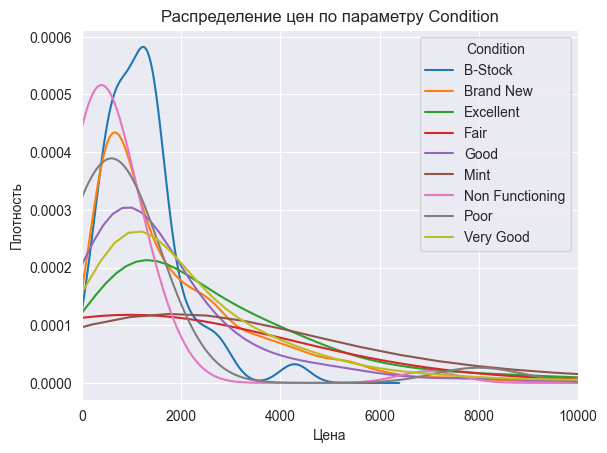

In [42]:
df.groupby("Condition")["price"].plot(kind = "kde", xlim= [0, 10000])

plt.title('Распределение цен по параметру Condition')
plt.ylabel('Плотность')
plt.xlabel('Цена')
plt.legend(title='Сondition')
plt.show()

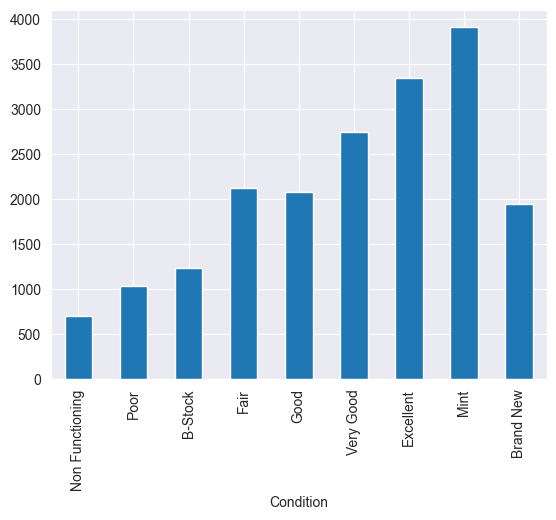

In [43]:
price_new = df.groupby("Condition")["price"].mean().reindex(quality_sorted).plot(kind = "bar")

n=10, p-value=0.0000
n=50, p-value=0.0000
n=100, p-value=0.0000
n=500, p-value=0.0000
n=1000, p-value=0.1691


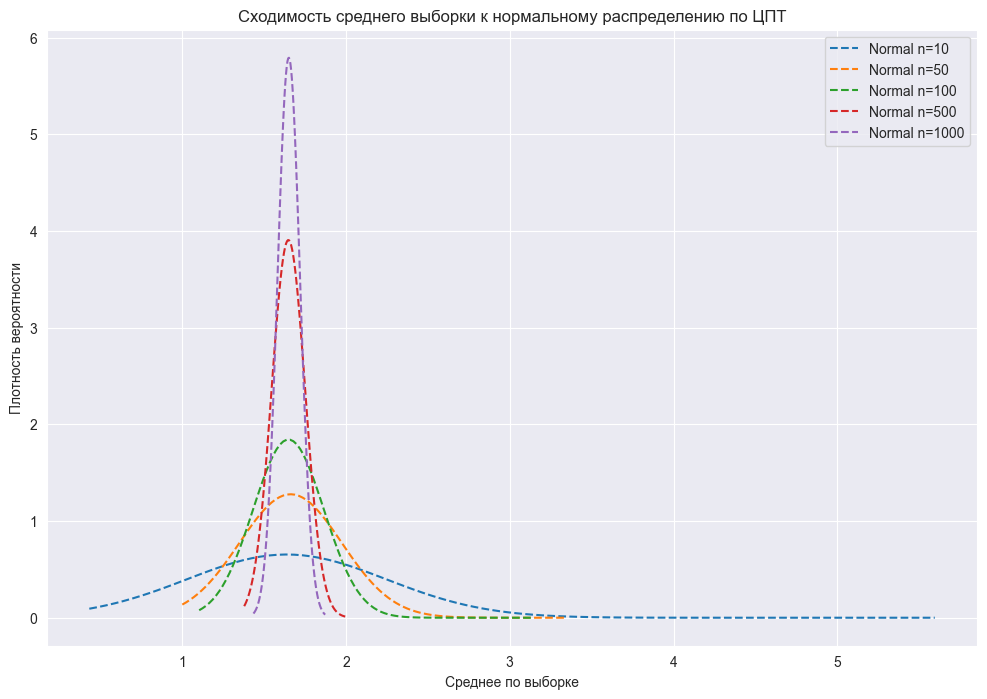

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro

# Параметры логнормального распределения
mu = 0  # Среднее нормального распределения
sigma = 1  # Стандартное отклонение

# Генерация выборок из логнормального распределения
def generate_lognormal_samples(mu, sigma, n, num_samples):
    samples = np.random.lognormal(mu, sigma, (num_samples, n))
    sample_means = samples.mean(axis=1)
    return sample_means

# Параметры эксперимента
n_values = [10, 50, 100, 500, 1000]  # Разные размеры выборки
num_samples = 1000  # Количество выборок для каждого размера

plt.figure(figsize=(12, 8))

for n in n_values:
    sample_means = generate_lognormal_samples(mu, sigma, n, num_samples)
    
    # Строим гистограмму для выборочных средних
    #sns.histplot(sample_means, kde=True, stat="density", label=f'n={n}', bins=30)
    
    # Сравниваем с нормальным распределением
    x = np.linspace(min(sample_means), max(sample_means), 100)
    plt.plot(x, norm.pdf(x, np.mean(sample_means), np.std(sample_means)), label=f'Normal n={n}', linestyle='dashed')

    # Проводим тест Шапиро-Уилка для проверки нормальности
    stat, p = shapiro(sample_means)
    print(f'n={n}, p-value={p:.4f}')  # p-value > 0.05 говорит о нормальности распределения

plt.legend()
plt.title('Сходимость среднего выборки к нормальному распределению по ЦПТ')
plt.xlabel('Среднее по выборке')
plt.ylabel('Плотность вероятности')
plt.show()